
This Notebook compares the different models that are in GEODYN II--- as of 2020-12-03.  
Author: Zach Waldron  
Date created: 2020-12-03   
Last modified:  2020-12-08

<!-- ```python
from datetime import date
today = date.today()
print("Last modifed:", today)
``` -->





# Start with a test of loading the data


## Import relevant packages and identify the data location




In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import os.path
import linecache

Identify data location:


If the below indicates ``TRUE`` then the data path exists.

In [3]:
# import sys  
# sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/')
# /content/drive/My Drive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/iieout

runs_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/MSIS86_run/'

ascii_xyz_file = runs_path + 'ascii_xyz'
ascii_kep_file = runs_path + 'ascii_kep'
iieout_file    = runs_path + 'iieout'
# print(ascii_xyz_file)
# print(ascii_kep_file)

print(os.path.isfile(ascii_xyz_file) )
print(os.path.isfile(ascii_kep_file) )
print(os.path.isfile(iieout_file) )

True
True
True


Change path to be the notebooks folder.


In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys  
sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/notebooks')

import Read_GEODYN_output
import Visualize_GEODYN_output


#### Construct an array that contains the xyz trajectory data for a single satellite

In [5]:
isat = 5658125

read_ascii_xyz = Read_GEODYN_output.read_ascii_xyz(ascii_xyz_file, iieout_file , isat )
data_dict = read_ascii_xyz.get_single_sat_data()

Loop through and extract indiv date vals: 0.1952824592590332
Fix decimals in the seconds column: 0.19571447372436523
Put all dates in a single column: 0.19613385200500488


/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isat_data['timeHHMM'] = timeHHMM
/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isat_data['year']  = year
/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

#### Visualize the xyz trajectory over time period for single satellite



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


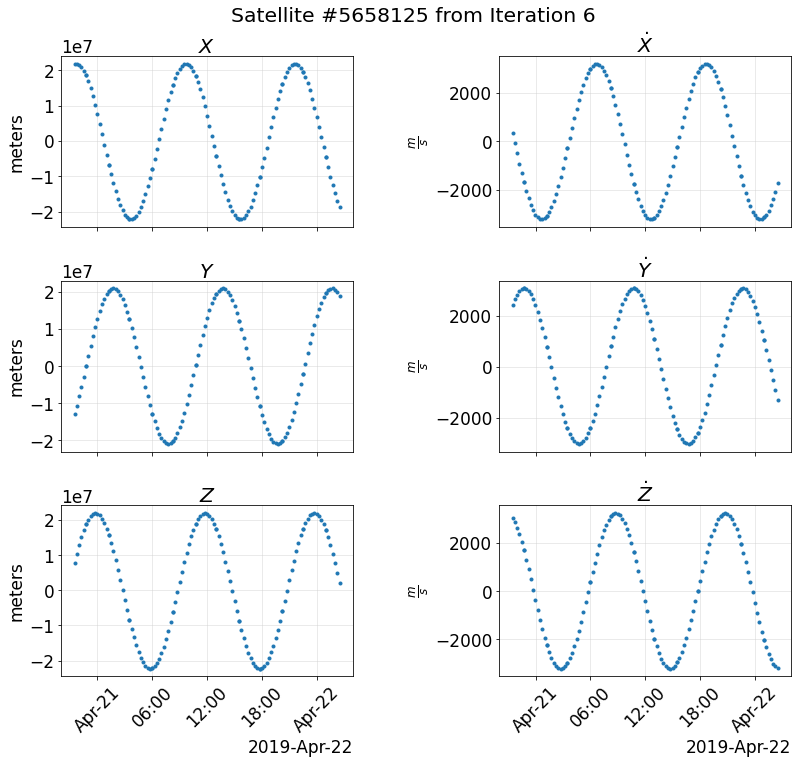

In [6]:
fig = Visualize_GEODYN_output.SingleSat_XYZ(isat, data_dict, read_ascii_xyz.iteration_number())

In [7]:
%load_ext autoreload
%autoreload 2
from Read_GEODYN_output import read_residuals_iieout

read_residuals_iieout = read_residuals_iieout(iieout_file, True)
SatIDs = read_residuals_iieout.find_Sat_IDs_resids()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


On iteration 6
- then go through each satellite and collect the residuals chronologically
- we can then plot out the residuals by satellite


In [8]:
%load_ext autoreload
%autoreload 2
from Read_GEODYN_output import read_residuals_iieout

read_residuals_iieout = read_residuals_iieout(iieout_file, True)
Resids_iter6 = read_residuals_iieout.read_observed_resids_by_sat( )



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  STATION-SATELLITE CONFIGURATION  DSS1WRNG           9806701           5044284           5553175                      (*NEW*)

5044284
Elapsed time: 2.3928425312042236
0 / 8545


In [9]:
%load_ext autoreload
%autoreload 2
from Read_GEODYN_output import read_residuals_iieout

read_residuals_iieout = read_residuals_iieout(iieout_file, True)  # define class parameters
Resids_iter6 = read_residuals_iieout.read_observed_resids_all( )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Elapsed time after line search setup: 6.922943115234375
Elapsed time after loop through then drop indecies: 43.28487801551819
Elapsed time after dropping all bad indicies after last obs no.: 43.45698285102844
Loop through and extract indiv date vals: 8.662431478500366
Fix decimals in the seconds column: 8.833108186721802
Put all dates in a single column: 9.339578628540039


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


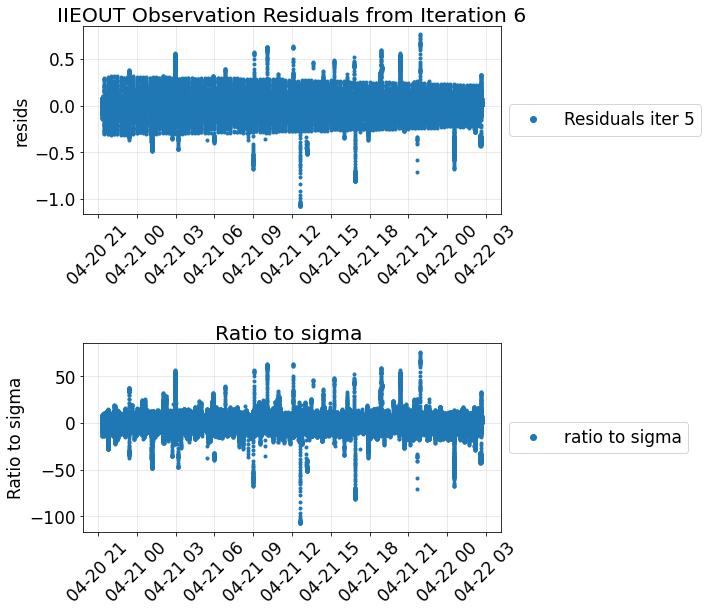

In [10]:
%load_ext autoreload
%autoreload 2
import Visualize_GEODYN_output
fig = Visualize_GEODYN_output.Residuals_Observ_All( Resids_iter6, str(int(read_residuals_iieout.iteration_number())))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


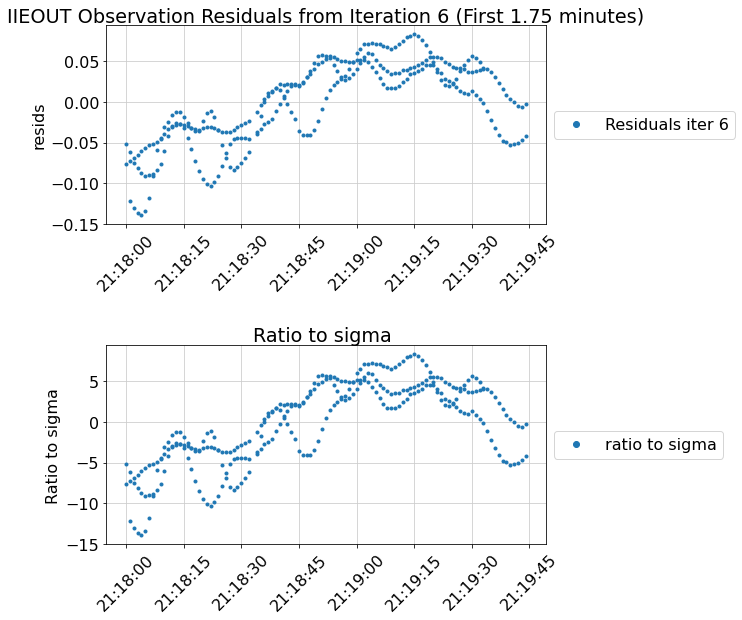

In [11]:
mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=False)
ax1.set_title('IIEOUT Observation Residuals from Iteration '+str(int(read_residuals_iieout.iteration_number())) +' (First 1.75 minutes)')
ax1.plot(pd.to_datetime(Resids_iter6['Date'][:300]), Resids_iter6['Residual'].values.astype(float)[:300] ,'.', label = 'Residuals iter 6')
ax1.set(ylabel=  'resids')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

ax2.set_title('Ratio to sigma ')
ax2.set(ylabel=  'Ratio to sigma')  
ax2.plot(pd.to_datetime(Resids_iter6['Date'][:300]), Resids_iter6['Ratio_to_sigma_fixed'].values.astype(float)[:300] ,'.', label = 'ratio to sigma')

handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


# # ax2.set(xlabel= 'Modified Julian Date') 
# ax2.set(xlabel= 'Date') 

fig.tight_layout( pad=5.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
# plt.savefig(f"{images_dir}/ObservationResidualsIter%d_shortTiem.png" % int(iteration) ) 
    


#### Plot modeled density along the orbit from fort.99 file

The below code takes about 90 seconds to run


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
True
Loop through and extract indiv date vals: 96.2947325706482
Put all dates in a single column: 96.32753825187683
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


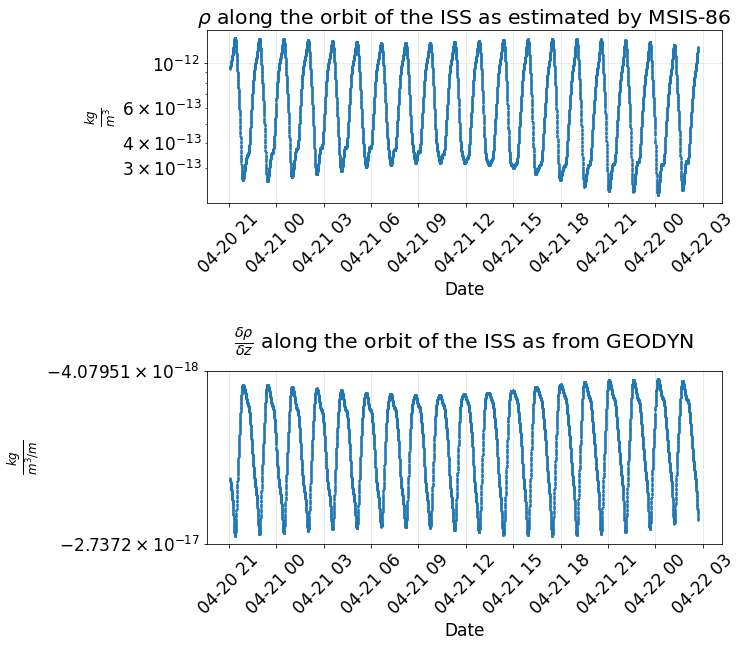

In [12]:
runs_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/MSIS86_run/'
%load_ext autoreload
%autoreload 2

denfil_msis86 = runs_path + 'densityfil'
print(os.path.isfile(denfil_msis86) )
from Read_densityfil import read_density_file

denmsis86 = read_density_file(denfil_msis86)
%load_ext autoreload
%autoreload 2
%matplotlib inline


from Visualize_GEODYN_output import plot_density
fig = plot_density( denmsis86, 'MSIS-86','ISS' )

# Compare GEODYN runs using different Atmospheric Models:


##### Load Model Data sets:

In [13]:
msis86_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/MSIS86_run/'

msis86_ascii_xyz_file = msis86_path + 'ascii_xyz'
msis86_ascii_kep_file = msis86_path + 'ascii_kep'
msis86_iieout_file    = msis86_path + 'iieout'
# print(ascii_xyz_file)
# print(ascii_kep_file)

print(os.path.isfile(msis86_ascii_xyz_file) )
print(os.path.isfile(msis86_ascii_kep_file) )
print(os.path.isfile(msis86_iieout_file) )

DTM_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/DTM_run/'

DTM_ascii_xyz_file = DTM_path + 'ascii_xyz'
DTM_ascii_kep_file = DTM_path + 'ascii_kep'
DTM_iieout_file    = DTM_path + 'iieout'
# print(ascii_xyz_file)
# print(ascii_kep_file)

print(os.path.isfile(DTM_ascii_xyz_file) )
print(os.path.isfile(DTM_ascii_kep_file) )
print(os.path.isfile(DTM_iieout_file) )

jacchia_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/Jacchia_run/'

jacchia_ascii_xyz_file = jacchia_path + 'ascii_xyz'
jacchia_ascii_kep_file = jacchia_path + 'ascii_kep'
jacchia_iieout_file    = jacchia_path + 'iieout'
# print(ascii_xyz_file)
# print(ascii_kep_file)

print(os.path.isfile(jacchia_ascii_xyz_file) )
print(os.path.isfile(jacchia_ascii_kep_file) )
print(os.path.isfile(jacchia_iieout_file) )

True
True
True
True
True
True
True
True
True


## Plot Trajectory Comparison:


In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys  
sys.path.insert(0, '/content/drive/My Drive/GEODYN-KAMODO Project/notebooks')

import Read_GEODYN_output
import Visualize_GEODYN_output

isat = 5658125
# 9806701
msis86_read_ascii_xyz = Read_GEODYN_output.read_ascii_xyz(msis86_ascii_xyz_file, msis86_iieout_file , isat )
msis86_data_dict = msis86_read_ascii_xyz.get_single_sat_data()


DTM_read_ascii_xyz = Read_GEODYN_output.read_ascii_xyz(DTM_ascii_xyz_file, DTM_iieout_file , isat )
DTM_data_dict = DTM_read_ascii_xyz.get_single_sat_data()


jacchia_read_ascii_xyz = Read_GEODYN_output.read_ascii_xyz(jacchia_ascii_xyz_file, jacchia_iieout_file , isat )
jacchia_data_dict = jacchia_read_ascii_xyz.get_single_sat_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isat_data['timeHHMM'] = timeHHMM
/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isat_data['year']  = year
/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

Loop through and extract indiv date vals: 0.024473190307617188
Fix decimals in the seconds column: 0.024918317794799805
Put all dates in a single column: 0.025325298309326172
Loop through and extract indiv date vals: 0.013468265533447266
Fix decimals in the seconds column: 0.013972759246826172
Put all dates in a single column: 0.01439809799194336
Loop through and extract indiv date vals: 0.013099908828735352
Fix decimals in the seconds column: 0.013592243194580078
Put all dates in a single column: 0.013997554779052734


In [15]:
jacchia_read_ascii_xyz = Read_GEODYN_output.read_ascii_xyz(jacchia_ascii_xyz_file, jacchia_iieout_file , isat )
jacchia_data_dict = jacchia_read_ascii_xyz.get_single_sat_data()

Loop through and extract indiv date vals: 0.016582250595092773
Fix decimals in the seconds column: 0.01698017120361328
Put all dates in a single column: 0.017659425735473633


/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isat_data['timeHHMM'] = timeHHMM
/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isat_data['year']  = year
/content/drive/My Drive/GEODYN-KAMODO Project/notebooks/Read_GEODYN_output.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


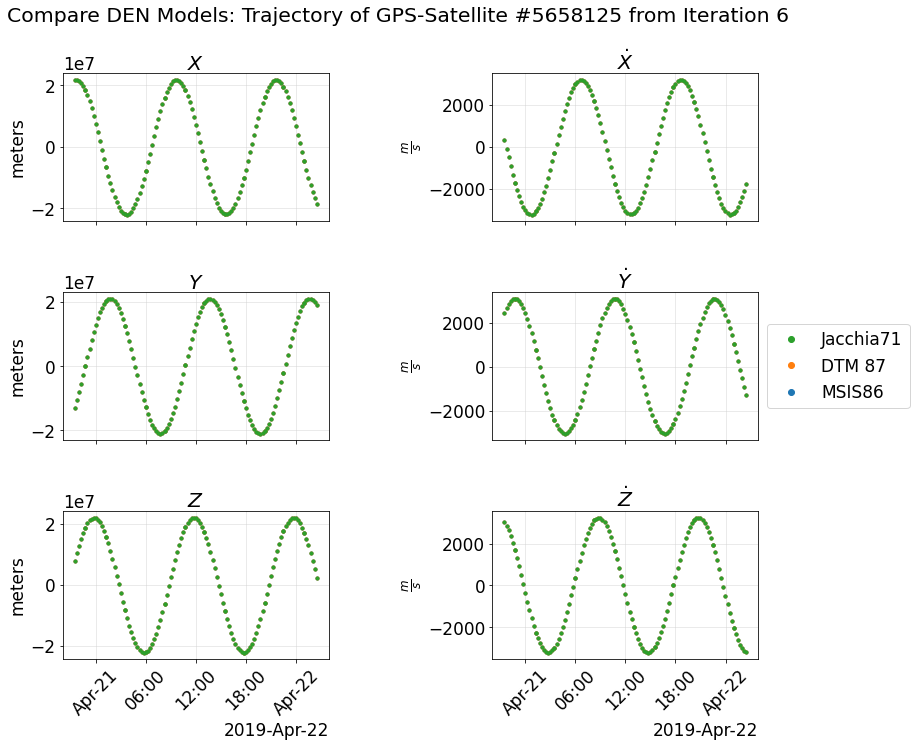

In [16]:
%load_ext autoreload
%autoreload 2
import Visualize_GEODYN_output

data_dict_list = {'MSIS86':msis86_data_dict, 'DTM 87':DTM_data_dict, 'Jacchia71':jacchia_data_dict}

fig = Visualize_GEODYN_output.SingleSat_XYZ_multiple_runs(isat,  msis86_read_ascii_xyz.iteration_number(), data_dict_list)

## Compare Density Outputs

In [17]:
runs_path = '/content/drive/My Drive/GEODYN-KAMODO Project/RUNS/ISS_GPS/'


denfil_msis86 = runs_path + 'MSIS86_run/densityfil'
print(os.path.isfile(denfil_msis86) )

denfil_DTM = runs_path + 'DTM_run/densityfil'
print(os.path.isfile(denfil_DTM) )

denfil_jacchia = runs_path + 'Jacchia_run/densityfil'
print(os.path.isfile(denfil_jacchia) )


True
True
True


In [18]:

%load_ext autoreload
%autoreload 2
from Read_densityfil import read_density_file

denmsis86 = read_density_file(denfil_msis86)

denDTM = read_density_file(denfil_DTM)

# denjacchia= read_density_file(denfil_jacchia)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loop through and extract indiv date vals: 96.86319780349731
Put all dates in a single column: 96.89616394042969
Loop through and extract indiv date vals: 97.54057216644287
Put all dates in a single column: 97.57516026496887


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 MSIS86
1 DTM 87


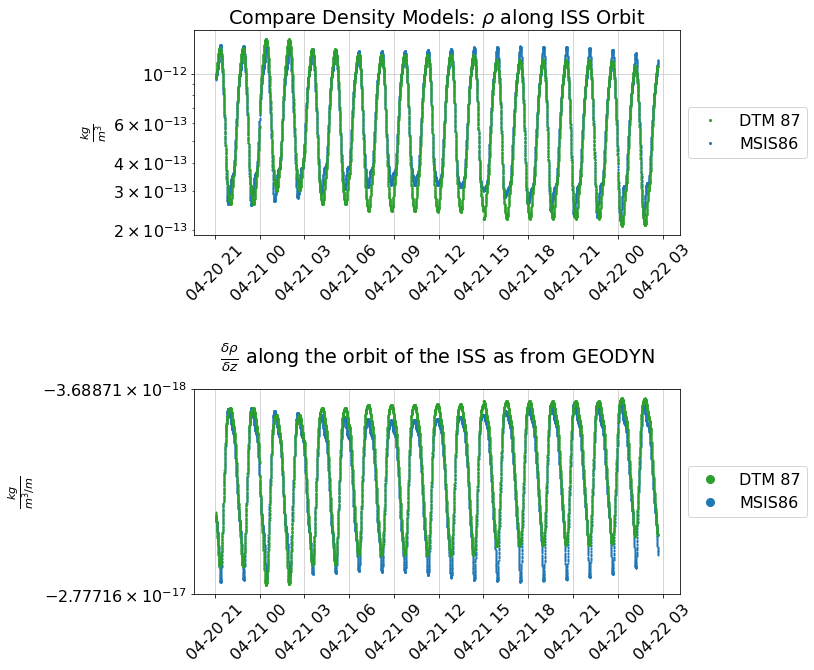

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from Visualize_GEODYN_output import plot_density
# fig = plot_density( denmsis86, 'MSIS-86','ISS' )
# fig = plot_density( denDTM, 'DTM-87','ISS' )
from Visualize_GEODYN_output import compare_multiple_density_models

dens_list = {'MSIS86':denmsis86, 'DTM 87':denDTM, }#'Jacchia 71':denjacchia}
choose_sat = 'ISS'
fig = compare_multiple_density_models(dens_list, choose_sat)


local_path = '/content/drive/MyDrive/GEODYN-KAMODO Project/notebooks/ISS_GPS_analysis/'
import os
images_dir = local_path +'plots'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)
fig.savefig(f"{images_dir}/Density@orbit_comparison.png", bbox_inches='tight')

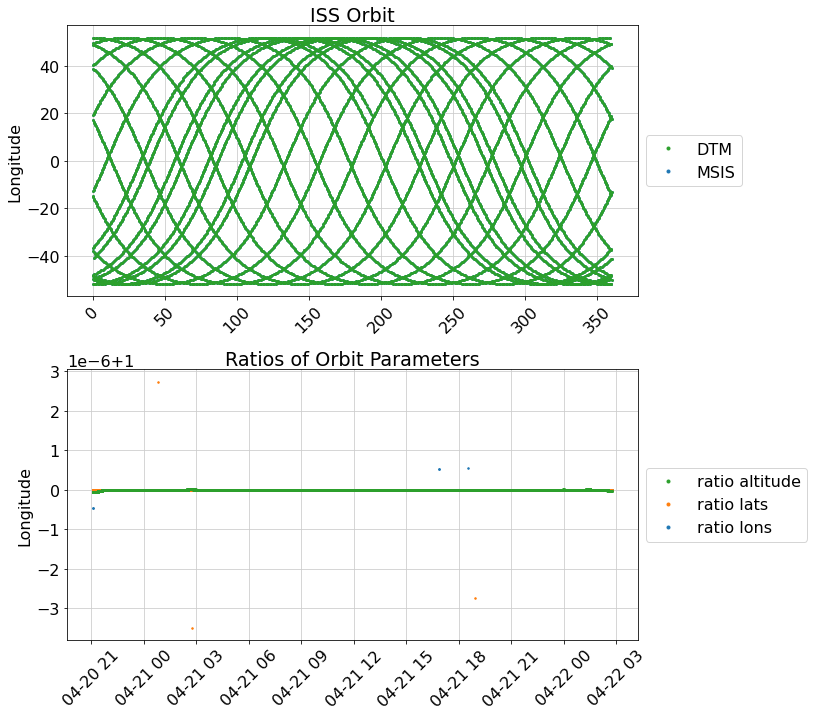

In [20]:
x = -1

mpl.rcParams['lines.markersize'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'

color86 = 'tab:blue'
color71 = 'tab:red'
color87 = 'tab:green'

fig, ( ax1, ax2) = plt.subplots(2, 1, figsize=(12,10), sharex=False)

ax1.set_title(r''+choose_sat+' Orbit')
ax1.plot(denmsis86['Lon'][:x], denmsis86['Lat'][:x] ,'.', color = color86, label = 'MSIS')
ax1.plot(denDTM['Lon'][:x], denDTM['Lat'][:x] ,'.',color = color87,  label = 'DTM')
ax1.set(ylabel=  'Latitude')  
ax1.set(ylabel=  'Longitude')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

ax2.set_title(r'Ratios of Orbit Parameters')
ax2.plot(denmsis86['Date'][:x] , denmsis86['Lon'][:x] / denDTM['Lon'][:x] ,'.', label = 'ratio lons')
ax2.plot(denmsis86['Date'][:x] , denmsis86['Lat'][:x] / denDTM['Lat'][:x] ,'.', label = 'ratio lats')
ax2.plot(denmsis86['Date'][:x] , denmsis86['Height (meters)'][:x] / denDTM['Height (meters)'][:x] ,'.', label = 'ratio altitude')

# ax2.plot(,  ,'.', label = 'DTM')
ax2.set(ylabel=  'Latitude')  
ax2.set(ylabel=  'Longitude')  
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )



fig.tight_layout( pad=2.0)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
        

In [21]:
# np.size(denmsis86['Date'][:x])

# (denmsis86['Height (meters)'][:x] / denDTM['Height (meters)'][:x])

In [22]:
%load_ext autoreload
%autoreload 2
from Read_GEODYN_output import read_residuals_iieout

# msis86_read_ascii_xyz = Read_GEODYN_output.read_ascii_xyz(msis86_ascii_xyz_file, msis86_iieout_file , isat )
# msis86_data_dict = msis86_read_ascii_xyz.get_single_sat_data()
msis86_read_residuals_iieout = read_residuals_iieout(msis86_iieout_file, True)  # define class parameters
msis86_Resids_iter6 = msis86_read_residuals_iieout.read_observed_resids_all( )


DTM_read_residuals_iieout = read_residuals_iieout(DTM_iieout_file, True)  # define class parameters
DTM_Resids_iter6 = DTM_read_residuals_iieout.read_observed_resids_all( )


jacchia_read_residuals_iieout = read_residuals_iieout(jacchia_iieout_file, True)  # define class parameters
jacchia_Resids_iter6 = jacchia_read_residuals_iieout.read_observed_resids_all( )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Elapsed time after line search setup: 7.020339488983154
Elapsed time after loop through then drop indecies: 43.61437225341797
Elapsed time after dropping all bad indicies after last obs no.: 43.71664524078369
Loop through and extract indiv date vals: 8.438780546188354
Fix decimals in the seconds column: 8.602320671081543
Put all dates in a single column: 9.102089166641235
Elapsed time after line search setup: 6.860738277435303
Elapsed time after loop through then drop indecies: 43.87263250350952
Elapsed time after dropping all bad indicies after last obs no.: 43.971712589263916
Loop through and extract indiv date vals: 11.714460611343384
Fix decimals in the seconds column: 11.881816625595093
Put all dates in a single column: 12.408411264419556
Elapsed time after line search setup: 7.014729022979736
Elapsed time after loop through then drop indecies: 43.653167963027954
Elapsed time after dropping all

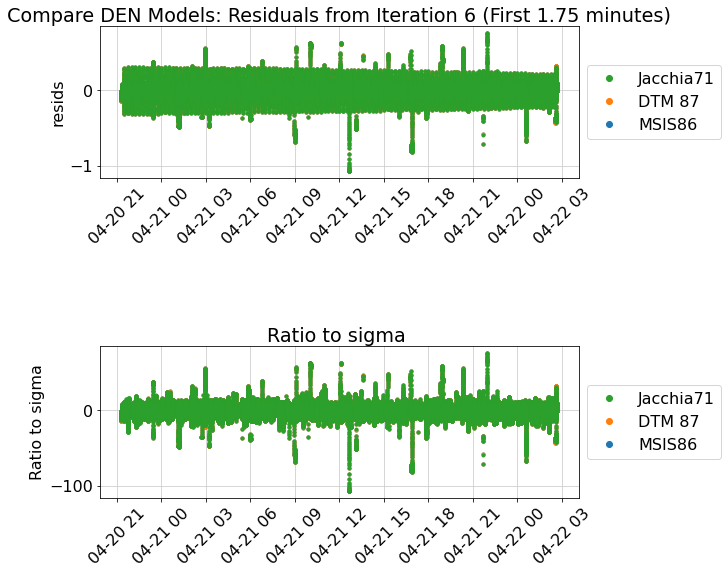

In [23]:
resids_list = {'MSIS86':msis86_Resids_iter6, 'DTM 87':DTM_Resids_iter6, 'Jacchia71':jacchia_Resids_iter6}


mpl.rcParams['lines.markersize'] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=False)
for i,val in enumerate(resids_list):

    ax1.set_title('Compare DEN Models: Residuals from Iteration '+str(int(msis86_read_ascii_xyz.iteration_number())) +' (First 1.75 minutes)')
    ax1.plot(pd.to_datetime(resids_list[val]['Date'][:]), resids_list[val]['Residual'].values.astype(float)[:] ,'.', label = val)
    ax1.set(ylabel=  'resids')  
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )

    ax2.set_title('Ratio to sigma ')
    ax2.set(ylabel=  'Ratio to sigma')  
    ax2.plot(pd.to_datetime(resids_list[val]['Date'][:]), resids_list[val]['Ratio_to_sigma_fixed'].values.astype(float)[:] ,'.', label = val)

    handles2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 2 )


    # # ax2.set(xlabel= 'Modified Julian Date') 
    # ax2.set(xlabel= 'Date') 

    fig.tight_layout( pad=5.0)


    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)

    # images_dir = '/content/drive/MyDrive/GEODYN-KAMODO Project/RUNS/adding_resid_orbit_printout/plots'
    # plt.savefig(f"{images_dir}/ObservationResidualsIter%d_shortTiem.png" % int(iteration) ) 
            


In [24]:
read_residuals_iieout = read_residuals_iieout(msis86_iieout_file, True)

In [25]:
# !pip install csv
import csv
import itertools

In [27]:
# with open(msis86_path  + 'all_sat_residsMSIS860', 'rb') as pickle_file:
#   dict_sats_resids = pickle.load(pickle_file)

In [32]:


if os.path.exists( msis86_path  + 'all_sat_residsMSIS86'):
  print('The file that contains the residuals for each GPS-config exists.')
  import pickle
  with open(msis86_path  + 'all_sat_residsMSIS86', 'rb') as pickle_file:
    dict_sats_resids = pickle.load(pickle_file)

else:
      
  iteration = '6'



  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  #-------------------------------------------------------------------------------
  '''
    Now find all the instances of the OBSERVATION RESIDUALS 
    header at this iteration.  These are stored in a list.
  '''

  SatIDs = read_residuals_iieout.find_Sat_IDs_resids()

  # Loop through the file and save the line 
  # numbers of the observation residual headers
  lines_list = [] 
  text_obs_resid = 'OBSERVATION RESIDUALS FOR ARC  1 FOR INNER ITERATION  '+ str(int(iteration))
  with open(msis86_iieout_file, 'r') as f:
      for line_no, line in enumerate(f):
          if text_obs_resid in line:
              lines_list.append(line_no)

  import time
  start = time.time()

  # initialize the dataframe that the data will be stored into
  init_df = pd.DataFrame(data={'YYMMDD'   :[],
                          'HHMM'    :[],
                          'Sec-UTC-R' :[],
                          'Observation'       :[],
                          'Residual'       :[],
                          'Ratio to sigma'       :[],
                          'Elev1'    :[],
                          'Elev2'    :[],
                          'OBS No.'    :[],
                          'Block'     :[],})
  # Initialize a dictionary such that each 
  # index of the dict is the empty dataframe
  dict_sat = {}
  for i in SatIDs:
    dict_sat[i]= init_df

  # Loop through the stored headers at their line numbers
  for i,iline in enumerate(lines_list):
    header_line = linecache.getline(msis86_iieout_file, iline+1+1) #
    if header_line[35:43] == 'DSS1WRNG':  #TODO: need to double check what this is...
      sat_line = int(header_line[70:81])  
      # print()
      #   print(line)
      # print(sat_line)

      # end = time.time()
      # elapsed = end - start
      # print("1 Elapsed time:",elapsed)
      
      YYMMDD    = []
      HHMM      = []
      Sec_utc   = []
      Observation = []
      Residual  = []
      Ratio_to_sigma = []
      Elev1      = []
      Elev2      = []
      OBS      = []
      Block      = []
      
      with open(msis86_iieout_file) as csvfile:
        N0 = lines_list[0] + 6  # number of lines to skip
        N1 = lines_list[0] + 6 + int((lines_list[0 + 1]-6 - lines_list[0]-7) )  # where to stop reading lines
        for row in csv.DictReader( itertools.islice(csvfile, N0, N1) ):
          YYMMDD.append( float(row[None][0][1:8]))
          HHMM.append(        float(row[None][0][8:13]))
          Sec_utc.append(     float(row[None][0][14:23]))
          Observation.append( float(row[None][0][29:43]))
          Residual.append(    float(row[None][0][48:58]))
          Ratio_to_sigma = float(row[None][0][62:70])
          Elev1          = float(row[None][0][74:84])
          Elev2          = float(row[None][0][86:96])
          OBS            = float(row[None][0][110:117])
          Block          = float(row[None][0][119:125])
          # print(row)
          # print(YYMMDD)

      end = time.time()
      elapsed = end - start
      # print("2 Elapsed time:",elapsed)

      A = pd.DataFrame(data={'YYMMDD'   :YYMMDD,
                            'HHMM'    :  HHMM,
                            'Sec-UTC-R' :Sec_utc,
                            'Observation'       :Observation,
                            'Residual'       :Residual,
                            'Ratio to sigma' : Ratio_to_sigma,
                            'Elev1'    : Elev1,
                            'Elev2'    : Elev2,
                            'OBS No.'    : OBS,
                            'Block'     : Block,})
      B = dict_sat[sat_line]
      dict_sat[sat_line] =  pd.concat([ B, A])
      end = time.time()
      elapsed = end - start
      print("Elapsed time:",elapsed)
      print(iline, line)
      print(i ,'/', str(len(lines_list)))
      # return RESID_OBSERV
    else:
      continue

  model_choose = 'MSIS86'
  import pickle


  with open(msis86_path +'all_sat_resids' + model_choose, 'wb') as pickle_file:
    pickle.dump(dict_sat, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)


Streaming output truncated to the last 5000 lines.
Elapsed time: 3542.0827219486237
2690382  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7140 / 8545
Elapsed time: 3542.668192386627
2690435  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7141 / 8545
Elapsed time: 3543.2653081417084
2690488  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7142 / 8545
Elapsed time: 3543.818593263626
2690541  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7143 / 8545
Elapsed time: 3544.3808677196503
2690594  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7144 / 8545
Elapsed time: 3544.9426345825195
2690647  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7145 / 8545
Elapsed time: 3545.5044910907745
2690700  THE TIME ON ALL IIE OUTPUT FILES REFER TO THE DEFAULT REFERENCE TIME 2430000.5

7146 / 8545
Elapsed time:

In [31]:

model_choose = 'MSIS86'
import pickle


with open(msis86_path +'all_sat_resids' + model_choose, 'wb') as pickle_file:
  pickle.dump(dict_sat, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# dict_sat 

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print a == b